#**21162101012_CBA_Yash_Lakhtariya**
<hr>

#**ML Practical 2**
<hr>

###Aim - Feature extraction using visualization and statistical test


####**0.1. Import dataset available at given url :**
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, na_values="?", header=None)

headers = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]
df.columns = headers

print("The first 5 rows of the dataframe:")
print(df.head())

The first 5 rows of the dataframe:
   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          13

####**0.2. Data preprocessing**


In [2]:

# Replace missing values with the mean for numerical columns and the mode for categorical columns
df['normalized-losses'].replace('?', np.nan, inplace=True)
df['bore'].replace('?', np.nan, inplace=True)
df['stroke'].replace('?', np.nan, inplace=True)
df['horsepower'].replace('?', np.nan, inplace=True)
df['peak-rpm'].replace('?', np.nan, inplace=True)
df['num-of-doors'].replace('?', np.nan, inplace=True)

# Fill missing values
df['normalized-losses'].fillna(df['normalized-losses'].astype('float').mean(), inplace=True)
df['bore'].fillna(df['bore'].astype('float').mean(), inplace=True)
df['stroke'].fillna(df['stroke'].astype('float').mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].astype('float').mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].astype('float').mean(), inplace=True)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Convert data types to appropriate formats
df['price'] = df['price'].replace('?', np.nan).astype('float')
df.dropna(subset=['price'], inplace=True)  # Remove rows with NaN values in 'price'

df['price'] = df['price'].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

##**1. List down all the continuous attributes in the dataset**

In [44]:
continuous_attributes = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nContinuous Attributes :\n")
for attribute in continuous_attributes:
    print(f'🟣 {attribute}')


Continuous Attributes :

🟣 symboling
🟣 normalized-losses
🟣 wheel-base
🟣 length
🟣 width
🟣 height
🟣 curb-weight
🟣 engine-size
🟣 bore
🟣 stroke
🟣 compression-ratio
🟣 horsepower
🟣 peak-rpm
🟣 city-mpg
🟣 highway-mpg
🟣 price


##**2. List down all the categorical attributes in the dataset**

In [8]:
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical Attributes :\n")
for attribute in categorical_attributes:
    print(f'🔵 {attribute}')


Categorical Attributes :

🔵 make
🔵 fuel-type
🔵 aspiration
🔵 num-of-doors
🔵 body-style
🔵 drive-wheels
🔵 engine-location
🔵 engine-type
🔵 num-of-cylinders
🔵 fuel-system


##**3. Draw regplot  between each continuous attribute and price and write down whether that attribute is related to price or not.**

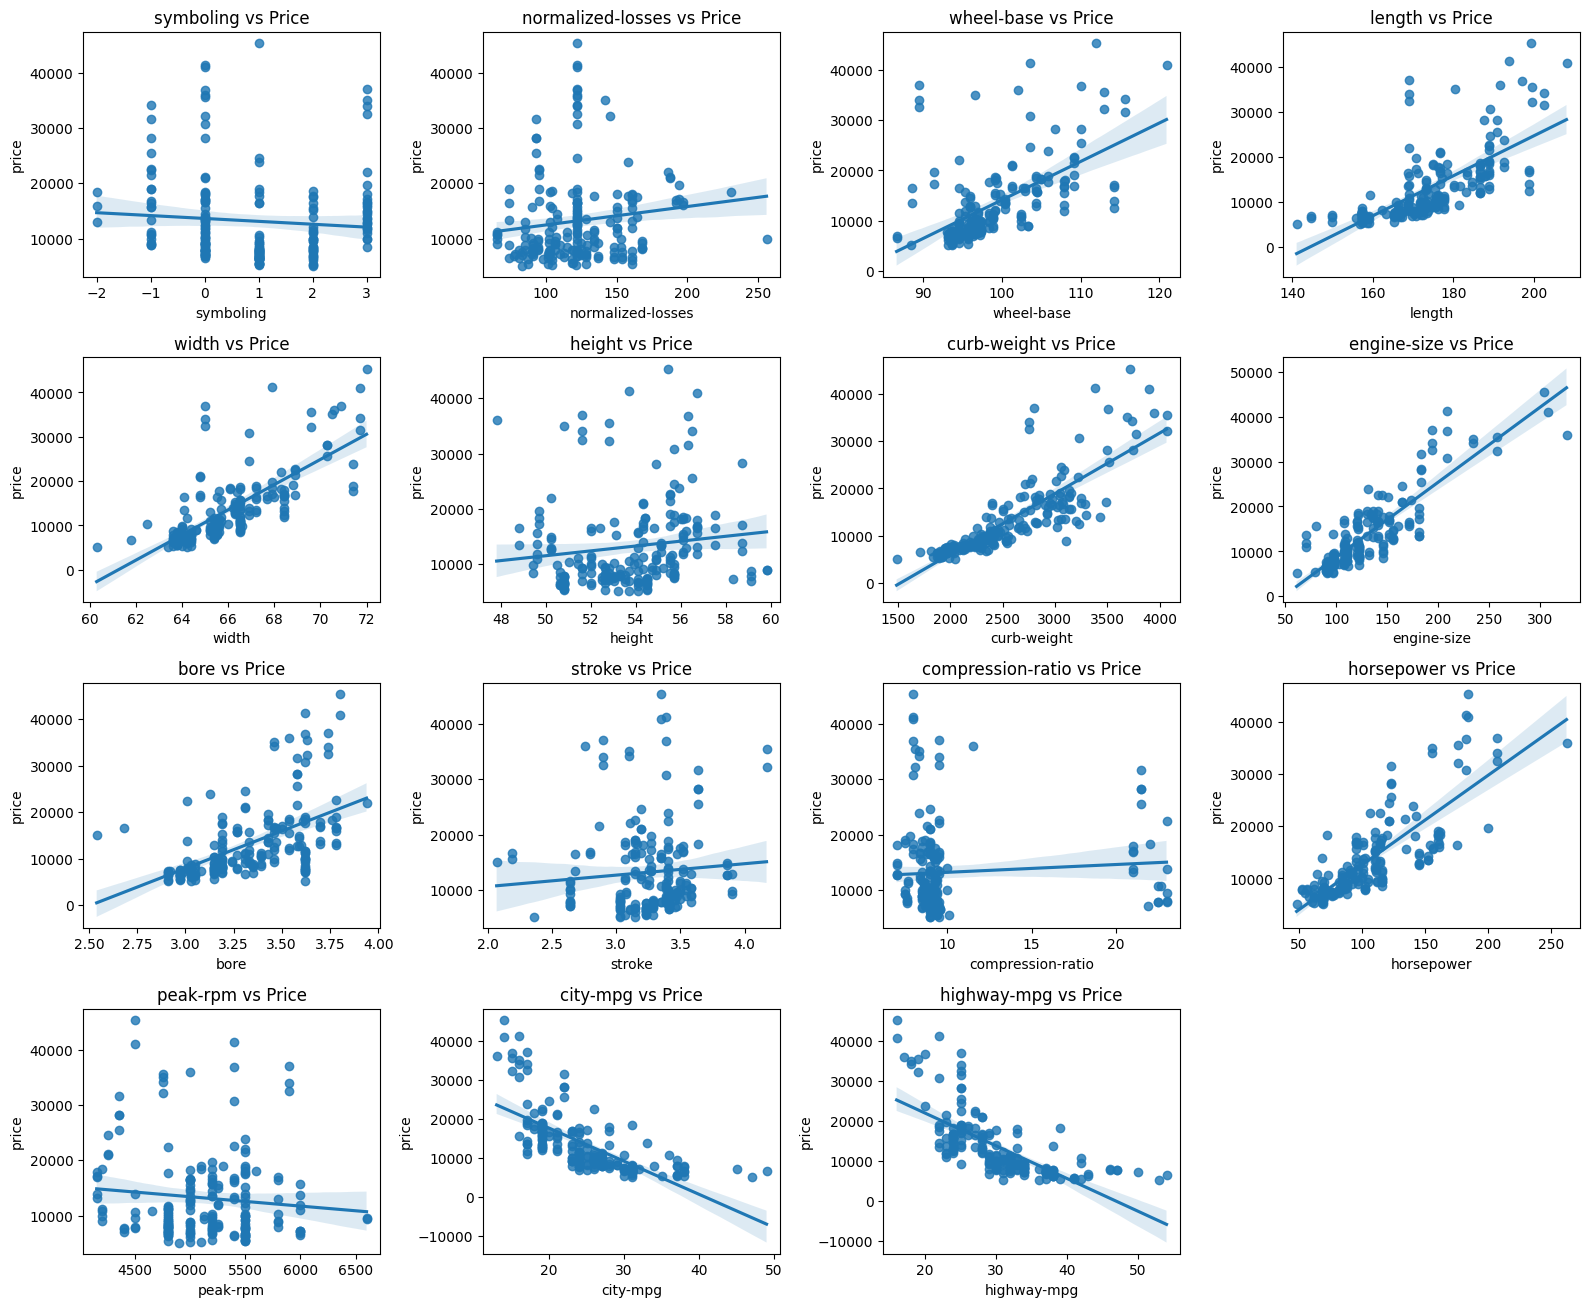


Relationship of Continuous Attributes with Price :

symboling : ❌
normalized-losses : ❌
wheel-base : ✔️
length : ✔️
width : ✔️
height : ❌
curb-weight : ✔️
engine-size : ✔️
bore : ✔️
stroke : ❌
compression-ratio : ❌
horsepower : ✔️
peak-rpm : ❌
city-mpg : ✔️
highway-mpg : ✔️


In [16]:
# Data visualization for continuous attributes
plt.figure(figsize=(16, 16))

for i, attr in enumerate(continuous_attributes):
    if attr != 'price':
        plt.subplot(5, 4, i + 1)
        sns.regplot(x=attr, y='price', data=df)
        plt.title(f'{attr} vs Price')

plt.tight_layout()
plt.show()

# Check if continuous attributes are related to price
print("\nRelationship of Continuous Attributes with Price :\n")

for attr in continuous_attributes:
    if attr != 'price':
        correlation = df[[attr, 'price']].corr().iloc[0, 1]
        print(f'{attr} : {"✔️" if abs(correlation) > 0.5 else "❌"}')


##**4. Draw boxplot between each  categorical attribute and price and write down whether that attribute is related to price or not.**

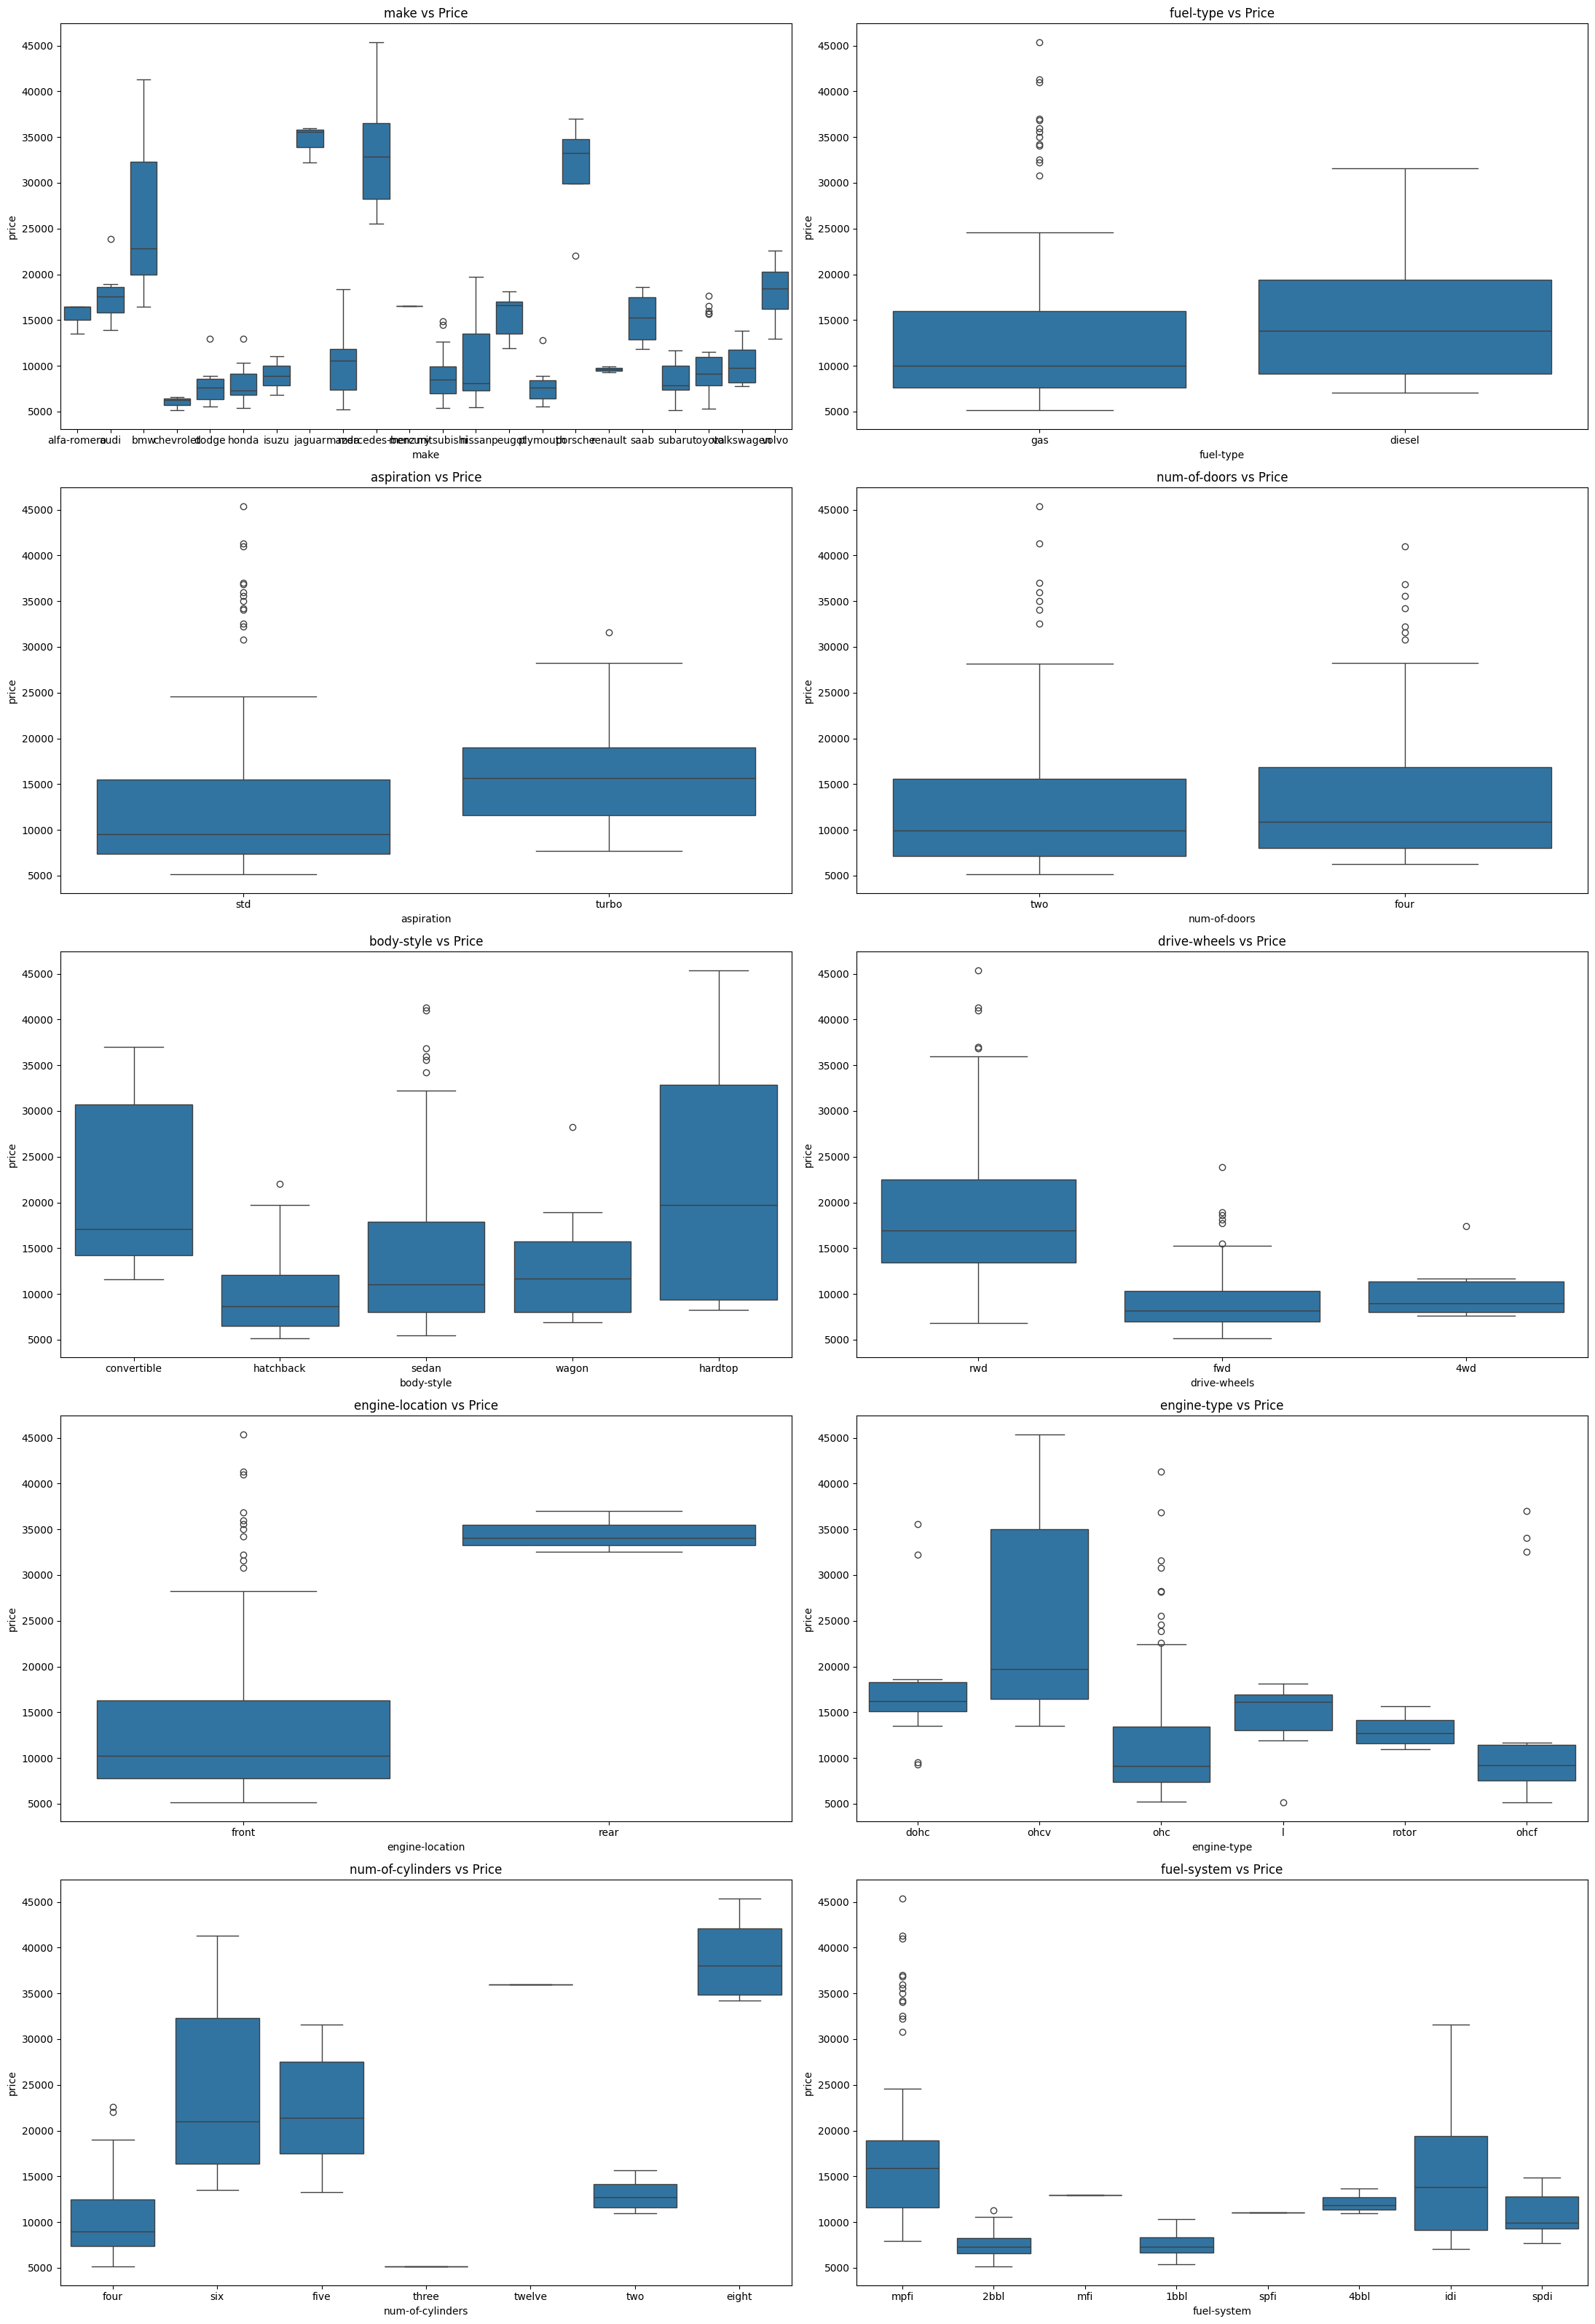


Relationship of Categorical Attributes with Price :

make : ✔️
fuel-type : ❌
aspiration : ✔️
num-of-doors : ❌
body-style : ✔️
drive-wheels : ✔️
engine-location : ✔️
engine-type : ✔️
num-of-cylinders : ✔️
fuel-system : ✔️


In [46]:
# Data visualization for categorical attributes
plt.figure(figsize=(22, 32))

for i, attr in enumerate(categorical_attributes):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=attr, y='price', data=df)
    plt.title(f'{attr} vs Price')

plt.tight_layout()
plt.show()

# Check if categorical attributes are related to price
print("\nRelationship of Categorical Attributes with Price :\n")

for attr in categorical_attributes:
    grouped_test = df[[attr, 'price']].groupby([attr])
    unique_values = df[attr].unique()
    if len(unique_values) > 1:
        f_val, p_val = stats.f_oneway(*[grouped_test.get_group(val)['price'] for val in unique_values if val in grouped_test.groups])
        print(f'{attr} : {"✔️" if p_val < 0.05 else "❌"}')


##**5. Calculate pearson correlation between each continuous attribute and price and write down whether that attribute is related to price or not.**

In [28]:
print("\nPearson Correlation Coefficients with Price (and if related) :\n")

for attr in continuous_attributes:
    if attr != 'price':
        correlation = df[[attr, 'price']].corr().iloc[0, 1]
        print(f'{attr} : {correlation:.2f} {"(✔️)" if abs(correlation) > 0.5 else "(❌)"}')



Pearson Correlation Coefficients with Price (and if related) :

symboling : -0.08 (❌)
normalized-losses : 0.13 (❌)
wheel-base : 0.58 (✔️)
length : 0.69 (✔️)
width : 0.75 (✔️)
height : 0.14 (❌)
curb-weight : 0.83 (✔️)
engine-size : 0.87 (✔️)
bore : 0.54 (✔️)
stroke : 0.08 (❌)
compression-ratio : 0.07 (❌)
horsepower : 0.81 (✔️)
peak-rpm : -0.10 (❌)
city-mpg : -0.69 (✔️)
highway-mpg : -0.70 (✔️)


##**6. Calculate ANOVA between each  categorical attribute and price and write down whether that attribute is related to price or not.**

In [36]:
print("\nANOVA Results for Categorical Attributes :\n")

for attr in categorical_attributes:
    grouped_test = df[[attr, 'price']].groupby([attr])
    unique_values = df[attr].unique()
    if len(unique_values) > 1:
        f_val, p_val = stats.f_oneway(*[grouped_test.get_group(val)['price'] for val in unique_values if val in grouped_test.groups])
        print(f'{attr} : \n\tF={f_val:.2f}, \n\tP={p_val:.2e} {"(✔️)" if p_val < 0.05 else "(❌)"}\n')



ANOVA Results for Categorical Attributes :

make : 
	F=33.23, 
	P=1.07e-50 (✔️)

fuel-type : 
	F=2.45, 
	P=1.19e-01 (❌)

aspiration : 
	F=6.63, 
	P=1.07e-02 (✔️)

num-of-doors : 
	F=0.36, 
	P=5.50e-01 (❌)

body-style : 
	F=9.13, 
	P=8.78e-07 (✔️)

drive-wheels : 
	F=67.95, 
	P=3.39e-23 (✔️)

engine-location : 
	F=24.50, 
	P=1.58e-06 (✔️)

engine-type : 
	F=9.85, 
	P=2.09e-08 (✔️)

num-of-cylinders : 
	F=54.94, 
	P=2.87e-39 (✔️)

fuel-system : 
	F=15.02, 
	P=1.31e-15 (✔️)



##**7. List down the attributes which has significant impact on price.**

In [45]:
significant_continuous = []
significant_categorical = []

for attr in continuous_attributes:
    if attr != 'price':
        correlation = df[[attr, 'price']].corr().iloc[0, 1]
        if abs(correlation) > 0.5:
            significant_continuous.append(attr)

for attr in categorical_attributes:
    grouped_test = df[[attr, 'price']].groupby([attr])
    unique_values = df[attr].unique()
    mean_prices = [grouped_test.get_group(val)['price'].mean() for val in unique_values if val in grouped_test.groups]
    max_diff = max(mean_prices) - min(mean_prices)

    if max_diff / df['price'].mean() > 0.2:  # Arbitrary threshold of 20% mean price difference
        significant_categorical.append(attr)

print("\nAttributes with Significant Impact on Price :\n")
print("Continuous :\n")
for attr in significant_continuous:
    print(f'🟣 {attr}')
print("\nCategorical :\n")
for attr in significant_categorical:
    print(f'🔵 {attr}')


Attributes with Significant Impact on Price :

Continuous :

🟣 wheel-base
🟣 length
🟣 width
🟣 curb-weight
🟣 engine-size
🟣 bore
🟣 horsepower
🟣 city-mpg
🟣 highway-mpg

Categorical :

🔵 make
🔵 fuel-type
🔵 aspiration
🔵 body-style
🔵 drive-wheels
🔵 engine-location
🔵 engine-type
🔵 num-of-cylinders
🔵 fuel-system


##**8. Clean the assigned dataset and find important features from it.**

In [43]:
important_features = significant_continuous + significant_categorical
print("\nImportant Features :\n")
for feature in important_features:
    print(f'🔶 {feature}')


Important Features :

🔶 wheel-base
🔶 length
🔶 width
🔶 curb-weight
🔶 engine-size
🔶 bore
🔶 horsepower
🔶 city-mpg
🔶 highway-mpg
🔶 make
🔶 fuel-type
🔶 aspiration
🔶 body-style
🔶 drive-wheels
🔶 engine-location
🔶 engine-type
🔶 num-of-cylinders
🔶 fuel-system
